In [1]:
import scanpy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scprep
import pandas as pd

In [2]:
adata_beta = scanpy.read_h5ad('../data/beta_run_2.h5ad')
adata_beta.var["mt"] = adata_beta.var['names'].str.startswith("mt-")
scanpy.pp.calculate_qc_metrics(adata_beta, qc_vars=["mt"], inplace=True)

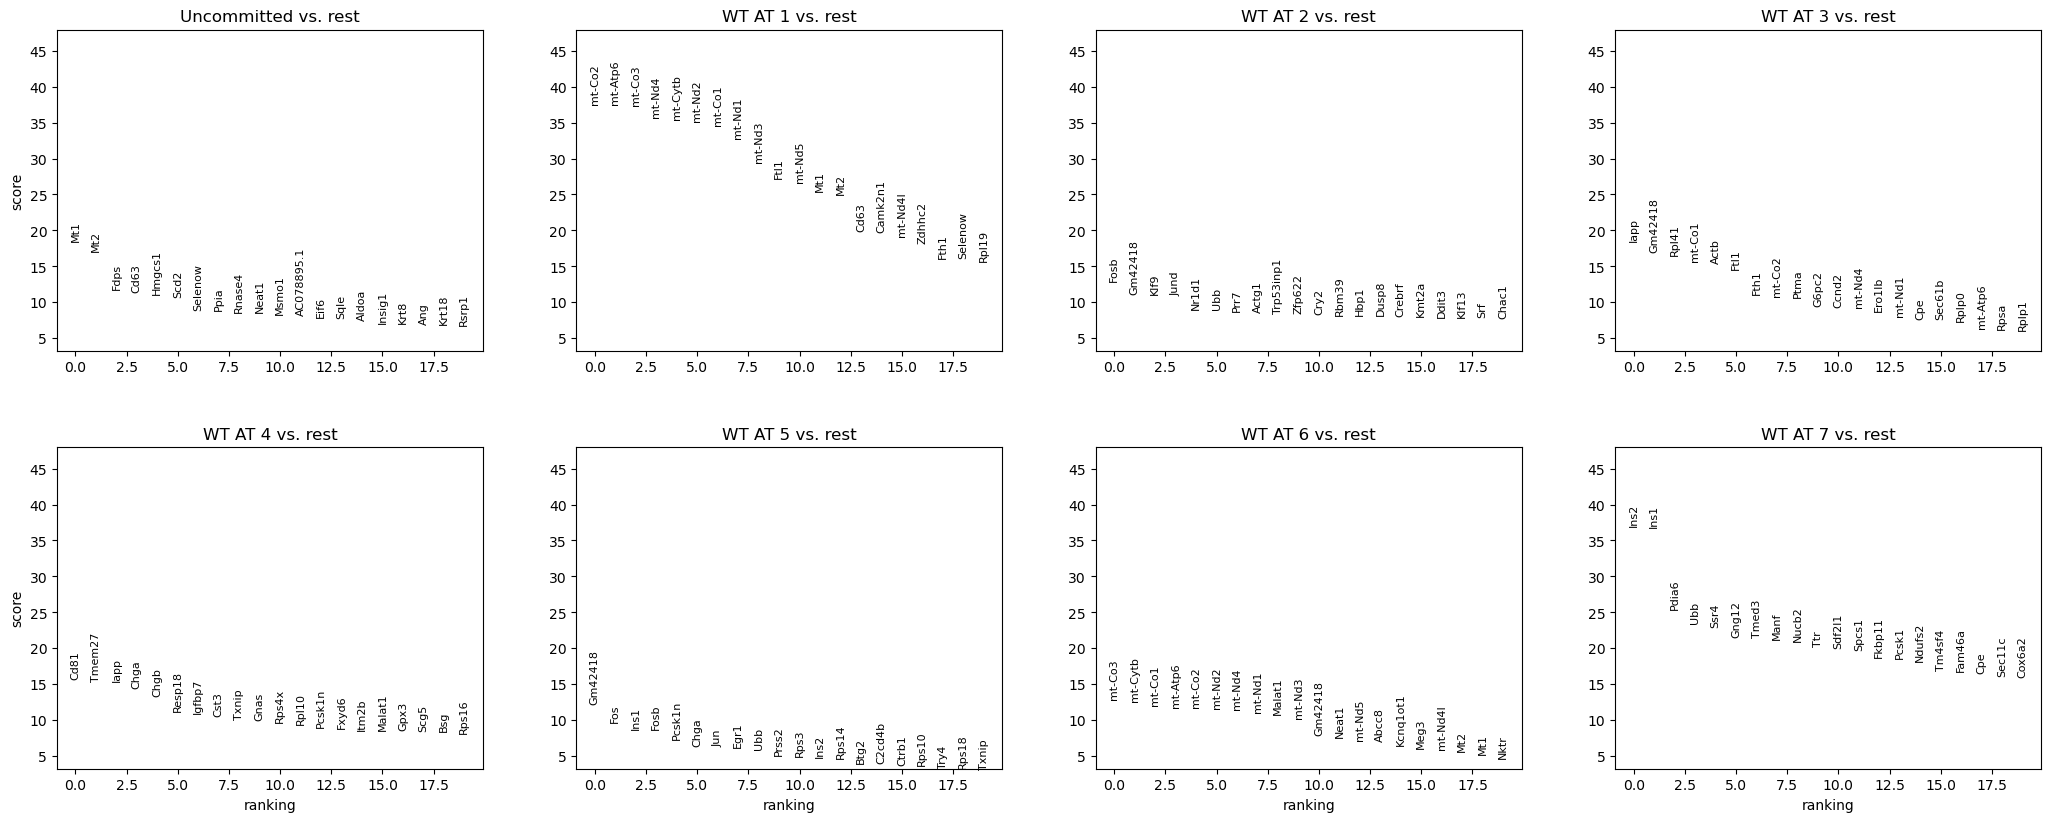

In [149]:
adata_beta_wt = adata_beta[adata_beta.obs['samples'] == 'WT']
scanpy.pp.filter_genes(adata_beta_wt, min_cells=5, ) # filter cells expressed in fewer than 5 WT 
scanpy.tl.rank_genes_groups(adata_beta_wt, groupby='AT_committment', method='wilcoxon', )
scanpy.pl.rank_genes_groups(adata_beta_wt, groupby='AT_committment', method='wilcoxon', gene_symbols='names')

In [165]:
with pd.ExcelWriter(f'results/WT_differential_expression.xlsx', mode='w') as writer: 
    for at in adata_beta_wt.obs['AT_committment'].cat.categories:
        degs = pd.DataFrame([adata_beta_wt.var.loc[adata_beta_wt.uns['rank_genes_groups']['names'][at]]['names'].values,
                         adata_beta_wt.uns['rank_genes_groups']['logfoldchanges'][at],
                         adata_beta_wt.uns['rank_genes_groups']['pvals_adj'][at]]).T
        degs.columns = ['Gene symbol', 'Log FC', 'BH-adjusted p-value']
        if at != 'Uncommitted':
            degs.to_excel(writer, sheet_name=at)

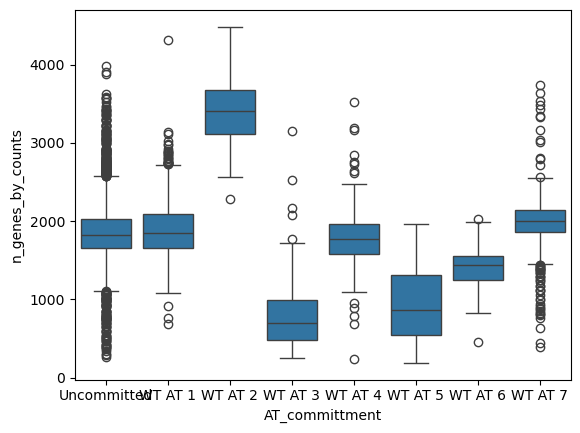

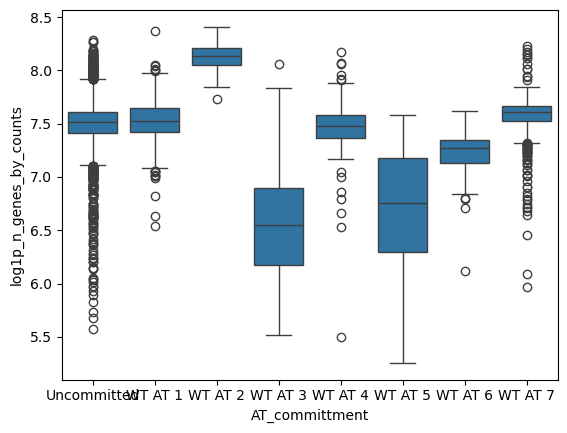

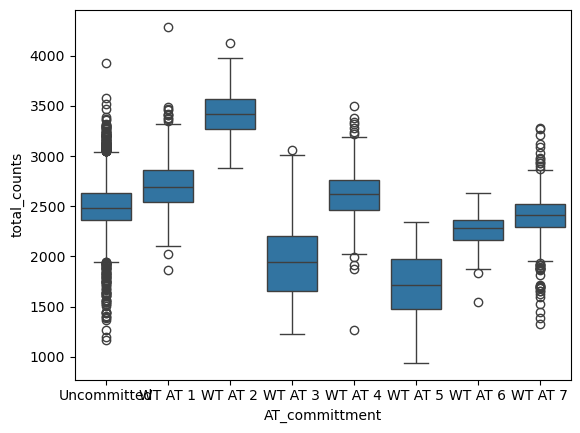

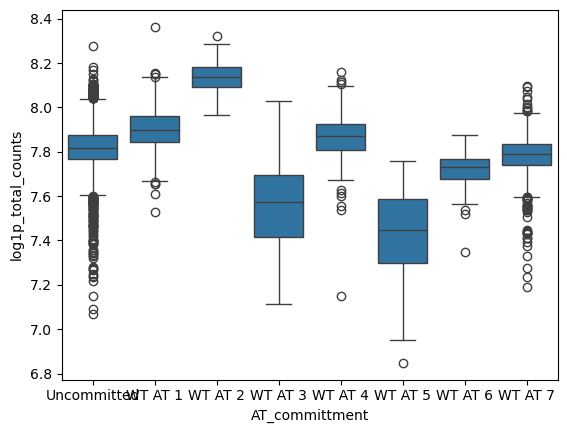

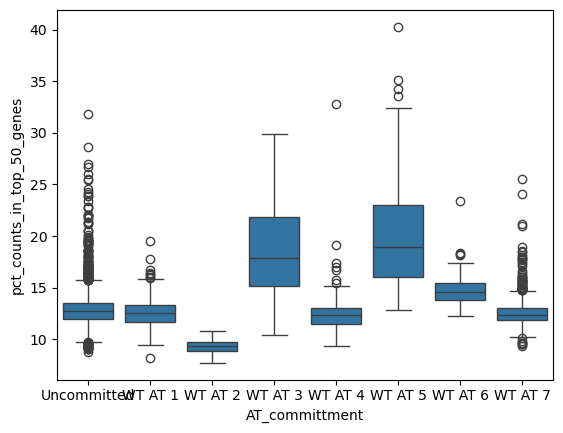

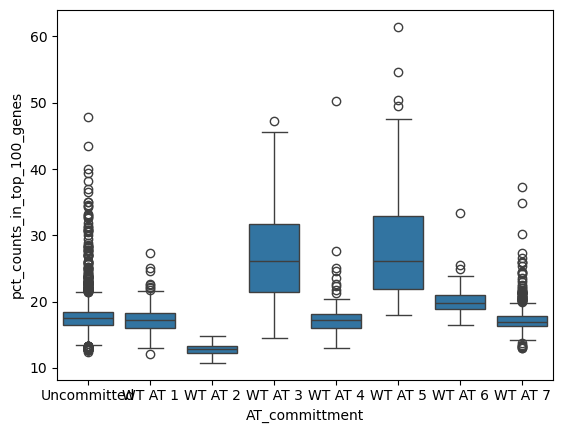

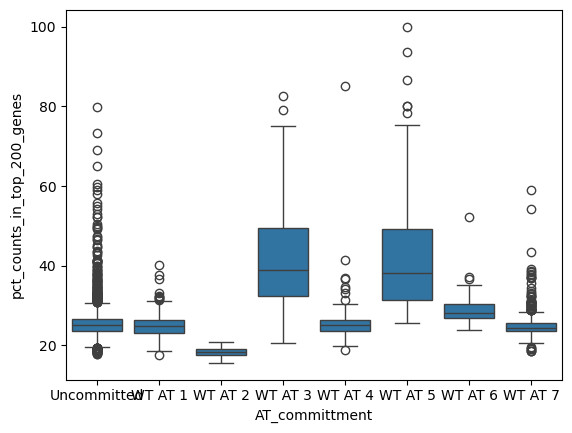

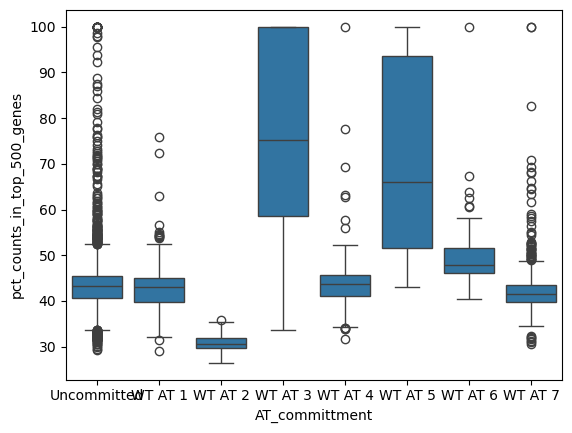

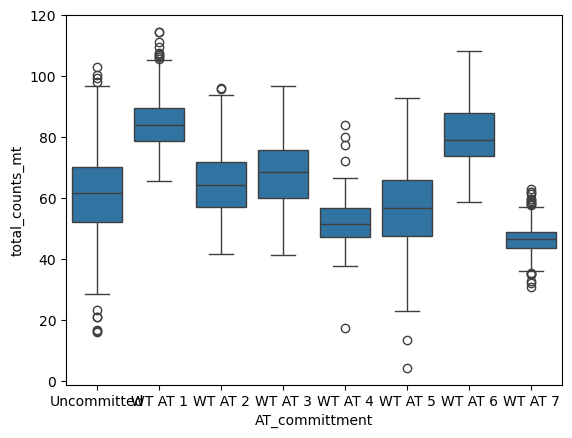

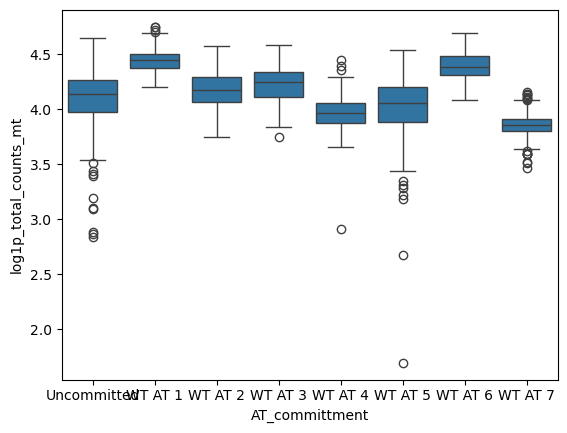

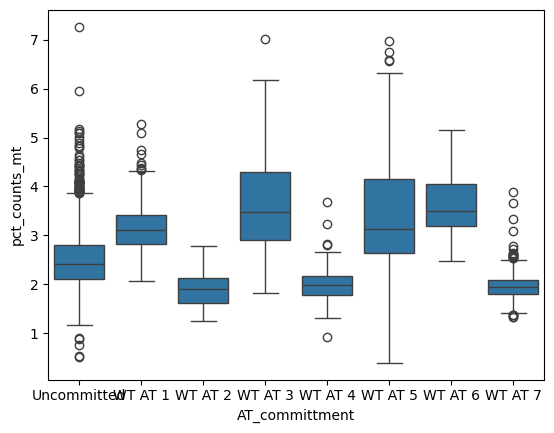

<Figure size 640x480 with 0 Axes>

In [126]:
for col in ['n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes',
       'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt']:
    sns.boxplot(adata_beta_wt.obs, x='AT_committment', y=col)
    plt.show(); plt.clf()

/gpfs/gibbs/project/krishnaswamy_smita/av622/conda_envs/gspa/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


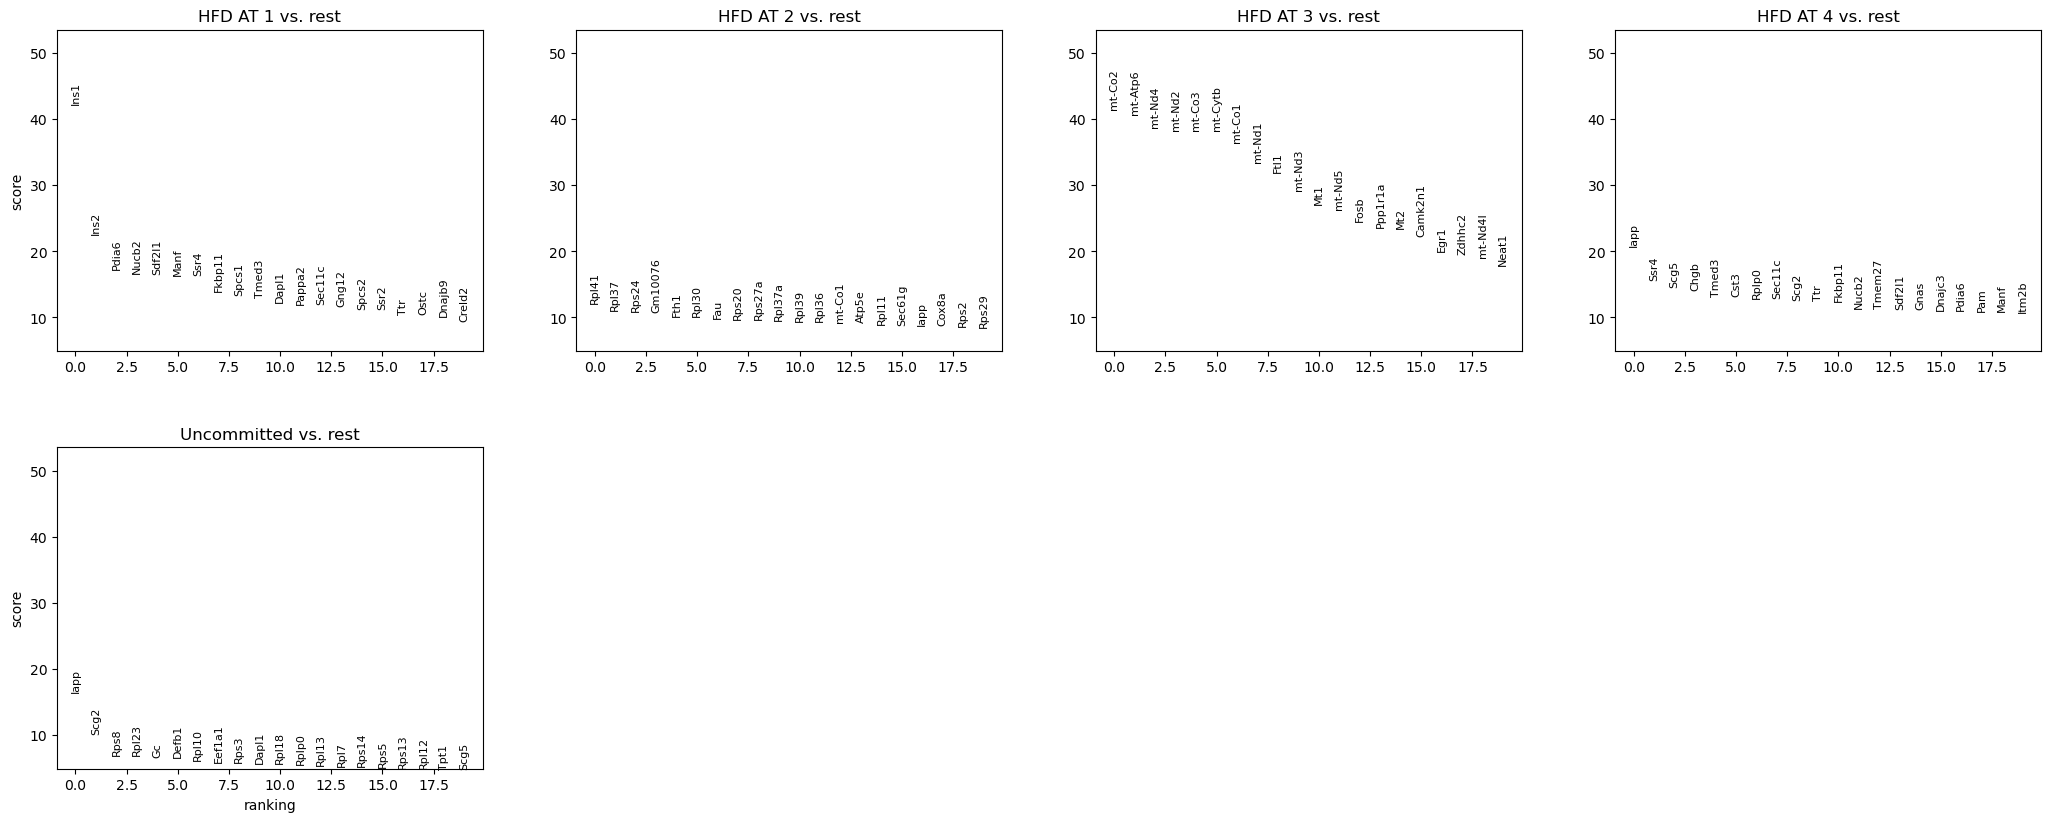

In [161]:
adata_beta_hfd = adata_beta[adata_beta.obs['samples'] == 'HFD']
scanpy.pp.filter_genes(adata_beta_hfd, min_cells=5, )
scanpy.tl.rank_genes_groups(adata_beta_hfd, groupby='AT_committment', method='wilcoxon', )
scanpy.pl.rank_genes_groups(adata_beta_hfd, groupby='AT_committment', method='wilcoxon', gene_symbols='names')

In [166]:
with pd.ExcelWriter(f'results/HFD_differential_expression.xlsx', mode='w') as writer: 
    for at in adata_beta_hfd.obs['AT_committment'].cat.categories:
        degs = pd.DataFrame([adata_beta_hfd.var.loc[adata_beta_hfd.uns['rank_genes_groups']['names'][at]]['names'].values,
                         adata_beta_hfd.uns['rank_genes_groups']['logfoldchanges'][at],
                         adata_beta_hfd.uns['rank_genes_groups']['pvals_adj'][at]]).T
        degs.columns = ['Gene symbol', 'Log FC', 'BH-adjusted p-value']
        if at != 'Uncommitted':
            degs.to_excel(writer, sheet_name=at)

/gpfs/gibbs/project/krishnaswamy_smita/av622/conda_envs/gspa/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


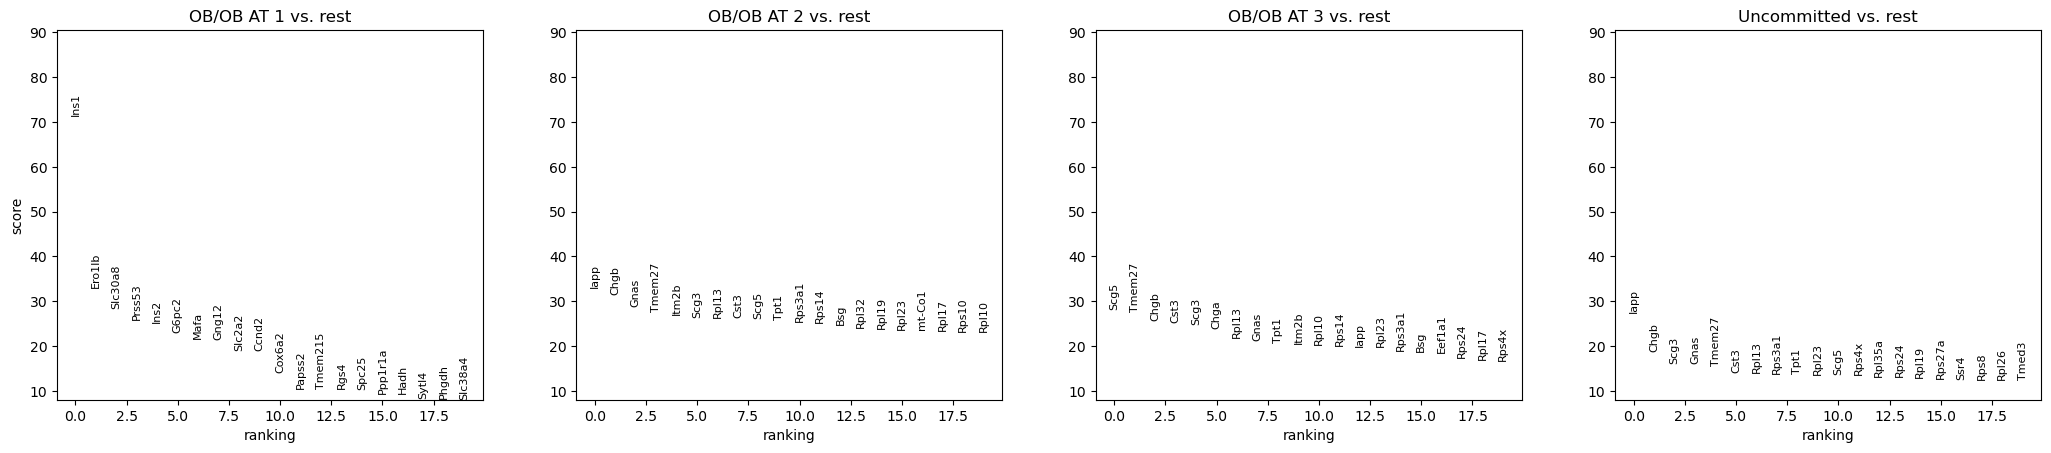

In [167]:
adata_beta_obob = adata_beta[adata_beta.obs['samples'] == 'OB/OB']
scanpy.pp.filter_genes(adata_beta_obob, min_cells=5, )
scanpy.tl.rank_genes_groups(adata_beta_obob, groupby='AT_committment', method='wilcoxon', )
scanpy.pl.rank_genes_groups(adata_beta_obob, groupby='AT_committment', method='wilcoxon', gene_symbols='names')

In [170]:
with pd.ExcelWriter(f'results/OB_OB_differential_expression.xlsx', mode='w') as writer: 
    for at in adata_beta_obob.obs['AT_committment'].cat.categories:
        degs = pd.DataFrame([adata_beta_obob.var.loc[adata_beta_obob.uns['rank_genes_groups']['names'][at]]['names'].values,
                         adata_beta_obob.uns['rank_genes_groups']['logfoldchanges'][at],
                         adata_beta_obob.uns['rank_genes_groups']['pvals_adj'][at]]).T
        degs.columns = ['Gene symbol', 'Log FC', 'BH-adjusted p-value']
        if at != 'Uncommitted':
            degs.to_excel(writer, sheet_name=at.replace('/', '_'))